# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [4]:
#EDA
print(df['Make'].value_counts())
print('\n')
print(df['Model'].value_counts())
print('\n')
print(df['Trim'].value_counts())
print('\n')
print(df['Type'].value_counts())


Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64


Malibu         60
Cavalier       60
AVEO           60
Ion            50
Cobalt         50
9_3 HO         40
Impala         30
Vibe           30
9_5            30
Bonneville     30
Grand Prix     30
Lacrosse       30
Monte Carlo    30
Deville        30
G6             20
Park Avenue    20
9_3            20
Corvette       20
Lesabre        20
Grand Am       20
9_5 HO         20
STS-V8         10
CTS            10
L Series       10
CST-V          10
GTO            10
Century        10
XLR-V8         10
Sunfire        10
STS-V6         10
Classic        10
9-2X AWD        4
Name: Model, dtype: int64


Sedan 4D               170
LS Sedan 4D             50
Coupe 2D                50
LT Sedan 4D             30
LS Coupe 2D             30
Quad Coupe 2D           20
Aero Sedan 4D           20
SE Sedan 4D             20
Arc Sedan 4D            20
GT Sedan 4D             

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [7]:
#Task 1
X=df[['Mileage']]
y=df[['Price']]
scale=StandardScaler()
X=scale.fit_transform(X)
y=scale.fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
model=linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred=model.predict(X_test)
r2_score(y_pred,y_test)

-90.80031031904846

In [ ]:
#task 2

<AxesSubplot:>

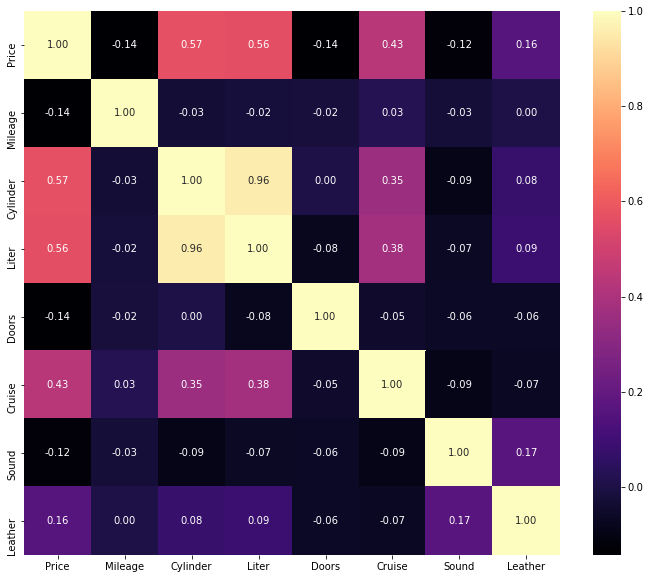

In [9]:
#Heatmap to get the corelation between different Features
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [10]:
X=df[['Mileage','Liter','Cylinder','Cruise','Doors','Sound','Leather']] 
y=df[['Price']]
scale=StandardScaler()
X=scale.fit_transform(X)
y=scale.fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
model=linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred=model.predict(X_test)
r2_score(y_pred,y_test)

-0.5021241830695318

In [ ]:
#Creating a more reliable model my using dummies fuction to include features like type and make

In [12]:
Make_d=pd.get_dummies(df.Make)
Make_d

,Buick,Cadillac,Chevrolet,Pontiac,SAAB,Saturn
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
799,0,0,0,0,0,1
800,0,0,0,0,0,1
801,0,0,0,0,0,1
802,0,0,0,0,0,1


In [14]:
Type_d=pd.get_dummies(df.Type)
Type_d

,Convertible,Coupe,Hatchback,Sedan,Wagon
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
799,0,0,0,1,0
800,0,0,0,1,0
801,0,0,0,1,0
802,0,0,0,1,0


In [15]:
df1=pd.concat([df,Make_d],axis=1)
df2=pd.concat([df1,Type_d],axis=1)

In [17]:
X=df2[['Mileage','Cylinder','Cruise','Doors','Sound','Leather','Buick','Cadillac','Chevrolet','Pontiac','SAAB','Saturn','Convertible','Coupe','Hatchback','Sedan','Wagon']] 
y=df2[['Price']]
scale=StandardScaler()
X=scale.fit_transform(X)
y=scale.fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
model=linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred=model.predict(X_test)
r2_score(y_pred,y_test)

0.9150398360814371

In [ ]:
#The model created is an Efficent one 